# Visualise EOPF ZARR files using GDAL

## Import Libraries

- GDAL: Geospatial Data Abstraction Library
- Numpy: Numerical Python
- Matplotlib: Python 2D plotting library

In [26]:
from osgeo import gdal

**Build the GDAL connection to the ZARR file**

Note: Always add **'ZARR:"/vsicurl/your_zarr_file_url'** to the ZARR file path

In [35]:
dsn = (
    'ZARR:"/vsicurl/https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/'
    'sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr":/measurements/grd'
)

dsn_eo = (
    'EOPFZARR:"/vsicurl/https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/'
    'sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr/measurements/grd"'
)

**Open the dataset using GDAL’s driver.**

**ZARR**

In [36]:
ds = gdal.Open(dsn, gdal.GA_ReadOnly)
if ds is None:
    raise RuntimeError("Failed to open the Zarr dataset with GDAL.")

**EOPFZARR**

In [37]:
ds_eo = gdal.Open(dsn_eo, gdal.GA_ReadOnly)
if ds_eo is None:
    raise RuntimeError("Failed to open the Zarr dataset with GDAL.")
ds_eo

ERROR 3: Cannot open file '/vsicurl/https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr/measurements/grd/.zmetadata'
ERROR 3: Load json file /vsicurl/https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/grd/S01SIWGRH_20240201T164915_0025_A146_S000_5464A_VH.zarr/measurements/grd/.zmetadata failed


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fad29ebb840> >

**Get the raster band (assuming there is one band).**

**ZARR**

In [29]:
band = ds.GetRasterBand(1)
width = band.XSize
height = band.YSize
print("Original dimensions: {} x {}".format(width, height))

Original dimensions: 26456 x 16675


**EOPFZARR**

In [38]:
band_eo = ds_eo.GetRasterBand(1)
width_eo = band_eo.XSize
height_eo = band_eo.YSize
print("Original dimensions: {} x {}".format(width_eo, height_eo))

Original dimensions: 26456 x 16675


**Define decimation factors.**

In [40]:
factor = 10
new_width = width // factor
new_height = height // factor

**EOPFZARR**

In [41]:
new_width_eo = width_eo // factor
new_height_eo = height_eo // factor

**Use gdal.Warp to create an in-memory dataset that decimates the data using nearest neighbor.Nearest neighbor resampling is equivalent to taking every nth pixel.**

**ZARR**

In [31]:
gdal.SetConfigOption("ZARR_ALLOW_BIG_TILE_SIZE", "YES")
decimated_ds = gdal.Warp(
    '',         # Output to an in-memory dataset.
    ds,         # Source dataset.
    format='MEM',
    width=new_width, height=new_height,
    resampleAlg='near'  # 'near' means nearest neighbor, so it just picks the pixel at the corresponding location.
)
if decimated_ds is None:
    raise RuntimeError("gdal.Warp failed to create decimated dataset.")

**EOPFZARR**

In [42]:
gdal.SetConfigOption("ZARR_ALLOW_BIG_TILE_SIZE", "YES")
decimated_ds_eo = gdal.Warp(
    '',         # Output to an in-memory dataset.
    ds_eo,         # Source dataset.
    format='MEM',
    width=new_width_eo, height=new_height_eo,
    resampleAlg='near'  # 'near' means nearest neighbor, so it just picks the pixel at the corresponding location.
)
if decimated_ds_eo is None:
    raise RuntimeError("gdal.Warp failed to create decimated dataset.")

**Read the decimated data into a numpy array.**

**ZARR**

In [43]:
data = decimated_ds.GetRasterBand(1).ReadAsArray()
print("Decimated dimensions: {} x {}".format(data.shape[1], data.shape[0]))

Decimated dimensions: 2645 x 1667


**EOPFZARR**

In [44]:
data_eo = decimated_ds_eo.GetRasterBand(1).ReadAsArray()
print("Decimated dimensions: {} x {}".format(data.shape[1], data.shape[0]))

Decimated dimensions: 2645 x 1667


**Plot the decimated data using Matplotlib.**

**ZARR**

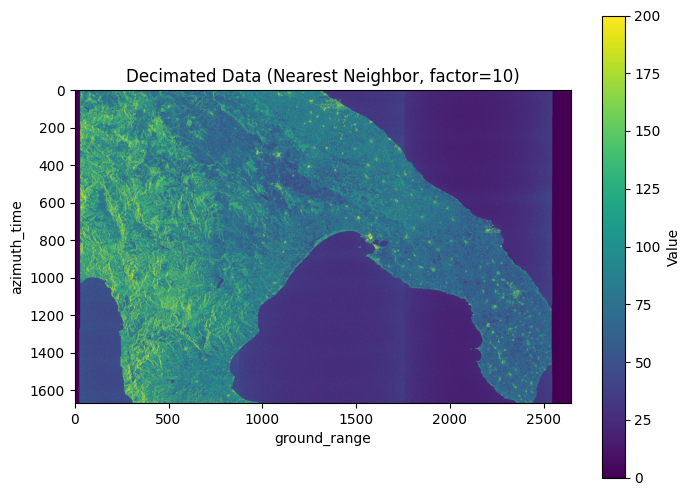

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(data, vmax=200)
plt.colorbar(label='Value')
plt.title('Decimated Data (Nearest Neighbor, factor=10)')
plt.xlabel('ground_range')
plt.ylabel('azimuth_time')
plt.show()

**EOPFZARR**

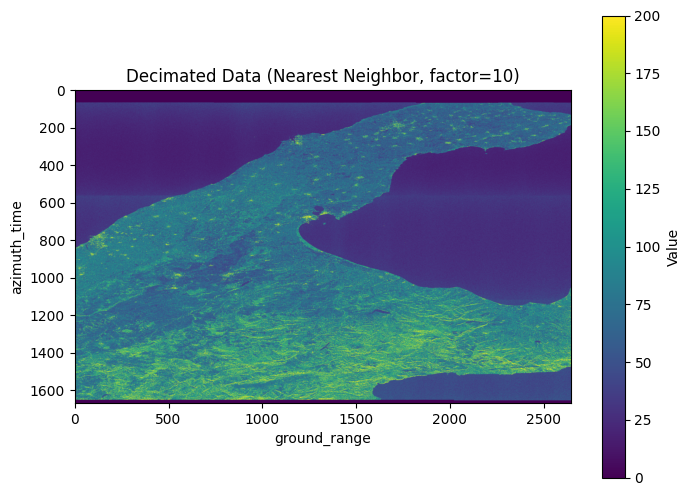

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(data_eo, vmax=200)
plt.colorbar(label='Value')
plt.title('Decimated Data (Nearest Neighbor, factor=10)')
plt.xlabel('ground_range')
plt.ylabel('azimuth_time')
plt.show()